# =============================================================

#  Feature Optimizing

# =============================================================

In [1]:
import pandas as pd

# 더미변수를 단순 분리해서 합친 데이터
df0 = pd.read_excel('preprocess0.xlsx',sheetname = 0)

# 더미변수를 각각 기준을 잡아서 분리시키고 합친 데이터
df1 = pd.read_excel('preprocess1.xlsx',sheetname = 0)

In [2]:
df0.shape, df1.shape

((2000, 87), (2000, 18))

In [3]:
del df0['NoShow']
df0.head()

,RunningTime,Published,Win,WholeAud,PoSA,BoxOffice,TV,Score,Rescreen,SF,...,singapore,southafranceica,spain,sweden,swiss,tai,tailand,taiwan,uruguay,usa
0,103,2007,0,1708979,32.3,1,0,5.77,0,0,...,0,0,0,0,0,0,0,0,0,0
1,104,2010,0,805,65.8,0,0,7.61,1,0,...,0,0,0,0,0,0,0,0,0,0
2,157,2007,0,1924678,38.2,1,0,8.51,1,0,...,0,0,0,0,0,0,0,0,0,1
3,110,2006,0,280,100.0,0,0,8.24,1,0,...,0,0,0,0,0,0,0,0,0,0
4,139,2006,0,563056,26.1,0,0,8.27,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df1.head()

,RunningTime,Published,Win,WholeAud,PoSA,BoxOffice,TV,Score,Rescreen,genre1,all,over12,over15,England,France,Japan,Korea,USA
0,103,2007,0,1708979,32.3,1,0,5.77,0,1,0,0,0,0,0,0,1,0
1,104,2010,0,805,65.8,0,0,7.61,1,1,1,0,0,0,0,0,0,0
2,157,2007,0,1924678,38.2,1,0,8.51,1,1,0,0,0,0,0,0,0,1
3,110,2006,0,280,100.0,0,0,8.24,1,0,0,0,1,0,0,1,0,0
4,139,2006,0,563056,26.1,0,0,8.27,0,0,0,1,0,0,0,1,0,0


# 1. Value Type별 분리

# 1 - 1. Numerical features

In [5]:
# Column 변환
# Published 를 '지금부터 몇년 전' 영화인지에 대한 수치로 변환
df0_p = df0['Published']
df0_p = pd.concat([df0_p], axis = 1)


f = lambda x : 2016-x
df0_p = df0_p.applymap(f)
df0_p.head()

,Published
0,9
1,6
2,9
3,10
4,10


In [8]:
# Scaling
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

df0_s = pd.concat([df0['RunningTime'], df0_p, df0['WholeAud'],df0['PoSA'],df0['Score']],axis = 1)
df1_s = pd.concat([df1['RunningTime'], df0_p, df1['WholeAud'],df1['PoSA'],df1['Score']],axis = 1)

In [9]:
df0_s_name = df0_s.columns
df1_s_name = df1_s.columns
print df0_s_name
print df1_s_name

Index([u'RunningTime', u'Published', u'WholeAud', u'PoSA', u'Score'], dtype='object')
Index([u'RunningTime', u'Published', u'WholeAud', u'PoSA', u'Score'], dtype='object')


In [10]:
# 각 데이터프레임 df0, df1에 대해 Scale/Robust_scale 시행
df0_s = scale(df0_s)
df0_s = pd.DataFrame(df0_s, columns = df0_s_name)
df0_rs = robust_scale(df0_s)
df0_rs = pd.DataFrame(df0_rs, columns = df0_s_name)
df1_s = scale(df1_s)
df1_s = pd.DataFrame(df1_s, columns = df1_s_name)
df1_rs = robust_scale(df1_s)
df1_rs = pd.DataFrame(df1_rs, columns = df1_s_name)

In [11]:
df1_rs.head()

,RunningTime,Published,WholeAud,PoSA,Score
0,0.065217,0.6,12.439738,-0.441398,-0.979079
1,0.108696,0.0,-0.042808,0.151261,0.047420
2,2.413043,0.6,14.015967,-0.337019,0.549512
3,0.369565,0.8,-0.046644,0.756303,0.398884
4,1.630435,0.8,4.065863,-0.551084,0.415621


# 1 - 2. Dummies + Binary Features

In [12]:
df0_d = pd.concat([df0.ix[:,'SF':'usa']],axis = 1) # dummies
df1_d = pd.concat([df1.ix[:,'genre1':'USA']],axis = 1)  # modified dummies
df0_d_b = pd.concat([df0['Win'], df0['BoxOffice'], df0['TV'], df0_d], axis = 1) # dummies + binary 
df1_d_b = pd.concat([df1['Win'], df1['BoxOffice'], df1['TV'], df1_d], axis = 1) # modified dummies + binary 

In [13]:
df1_d_b.head()

,Win,BoxOffice,TV,genre1,all,over12,over15,England,France,Japan,Korea,USA
0,0,1,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,1,0,0


# 2. Feature 선별

In [14]:
y = df0['Rescreen'].as_matrix().astype('string')

In [15]:
df00 = pd.concat([df0_s, df0_d_b],axis = 1)  # scale(df0) + dummies + binary
df01 = pd.concat([df0_s, df1_d_b],axis = 1)  # scale(df0) + modified dummies + binary
df02 = pd.concat([df0_rs, df0_d_b],axis = 1)  # robust_scale(df0) + dummies + binary
df03 = pd.concat([df0_rs, df1_d_b],axis = 1)  # robust_scale(df0) + modified dummies + binary
df10 = pd.concat([df1_s, df0_d_b],axis = 1)  # scale(df1) + dummies + binary
df11 = pd.concat([df1_s, df1_d_b],axis = 1)  # scale(df1) + modified dummies + binary
df12 = pd.concat([df1_rs, df0_d_b],axis = 1)  # robust_scale(df1) + dummies + binary
df13 = pd.concat([df1_rs, df1_d_b],axis = 1)  # robust_scale(df1) + modified dummies + binary

df_00 = pd.concat([df0_s, df0_d_b],axis = 1).as_matrix()
df_01 = pd.concat([df0_s, df1_d_b],axis = 1).as_matrix()
df_02 = pd.concat([df0_rs, df0_d_b],axis = 1).as_matrix()
df_03 = pd.concat([df0_rs, df1_d_b],axis = 1).as_matrix()
df_10 = pd.concat([df1_s, df0_d_b],axis = 1).as_matrix()
df_11 = pd.concat([df1_s, df1_d_b],axis = 1).as_matrix()
df_12 = pd.concat([df1_rs, df0_d_b],axis = 1).as_matrix()
df_13 = pd.concat([df1_rs, df1_d_b],axis = 1).as_matrix()

# 2 - 1. RandomForest
: 독립변수의 중요도 파악

Feature Ranking:
1.feature 2 (0.150789) : RunningTime
2.feature 3 (0.137418) : Published
3.feature 4 (0.132080) : WholeAud
4.feature 0 (0.121387) : PoSA
5.feature 1 (0.108442) : Score
6.feature 29 (0.022933) : Win
7.feature 28 (0.019569) : BoxOffice
8.feature 62 (0.017009) : TV
9.feature 15 (0.015354) : SF
10.feature 84 (0.015218) : action
11.feature 47 (0.014966) : adventure
12.feature 5 (0.013552) : ani
13.feature 27 (0.013311) : comedy
14.feature 7 (0.012422) : crime
15.feature 21 (0.012320) : documentary
16.feature 14 (0.011686) : drama
17.feature 44 (0.010325) : erotic
18.feature 6 (0.009316) : family
19.feature 61 (0.009293) : fantasy
20.feature 11 (0.009233) : historical
21.feature 12 (0.008926) : horror
22.feature 9 (0.007299) : melo
23.feature 37 (0.006141) : mistery
24.feature 80 (0.005827) : musical
25.feature 18 (0.005646) : performance
26.feature 8 (0.005555) : thriller
27.feature 20 (0.005068) : war
28.feature 48 (0.005059) : all
29.feature 13 (0.004886) : over12
30.featu

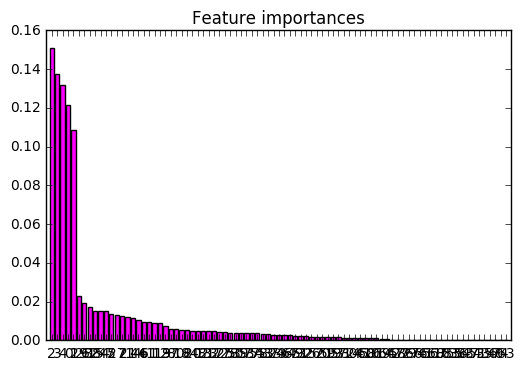

In [16]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pylab as plt

RF = ExtraTreesClassifier(n_estimators=250, random_state=0)
RF.fit(df_00, y)

importances = RF.feature_importances_

indices = np.argsort(importances)[::-1]

print "Feature Ranking:"
for f in range(df_00.shape[1]):
    print "%d.feature %d (%f) : %s" % (f+1, indices[f], importances[indices[f]], df00.columns[f])

plt.title("Feature importances")
plt.bar(range(df_00.shape[1]), importances[indices], color="magenta",  align="center")
plt.xticks(range(df_00.shape[1]), indices)
plt.xlim([-1, df_00.shape[1]])
plt.show()

In [ ]:
# numerical feature들과 binary feature들은 중요도(설명력)가 높은 것으로 보인다.

Feature Ranking:
1.feature 2 (0.185652) : RunningTime
2.feature 3 (0.176650) : Published
3.feature 4 (0.163044) : WholeAud
4.feature 0 (0.142710) : PoSA
5.feature 1 (0.125201) : Score
6.feature 8 (0.035820) : Win
7.feature 11 (0.022631) : BoxOffice
8.feature 15 (0.020358) : TV
9.feature 10 (0.018961) : genre1
10.feature 9 (0.015992) : all
11.feature 16 (0.015497) : over12
12.feature 7 (0.014056) : over15
13.feature 5 (0.013921) : England
14.feature 14 (0.013675) : France
15.feature 13 (0.013602) : Japan
16.feature 12 (0.012887) : Korea
17.feature 6 (0.009343) : USA


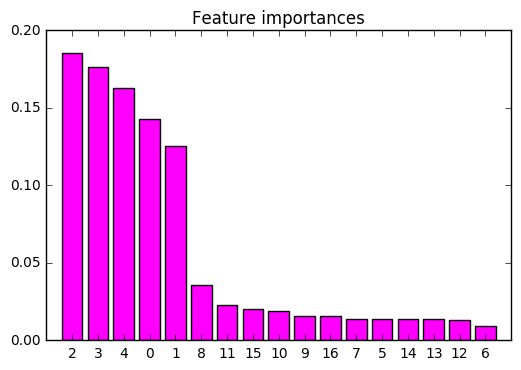

In [18]:
RF = ExtraTreesClassifier(n_estimators=250, random_state=0)
RF.fit(df_01, y)

importances = RF.feature_importances_

indices = np.argsort(importances)[::-1]

print "Feature Ranking:"
for f in range(df_01.shape[1]):
    print "%d.feature %d (%f) : %s" % (f+1, indices[f], importances[indices[f]], df01.columns[f])
    
plt.title("Feature importances")
plt.bar(range(df_01.shape[1]), importances[indices], color="magenta",  align="center")
plt.xticks(range(df_01.shape[1]), indices)
plt.xlim([-1, df_01.shape[1]])
plt.show()

In [ ]:
# modified dummies들이 큰 영향을 미치는 건 아닌 것으로 보인다.
# 오히려 numerical features의 영향력이 더 커지는 것으로 보면 dummies를 제외해도 상관없을 것으로 생각된다.

# 2 - 2. PCA
: 독립변수의 차원 축소

In [ ]:
# 실질적으로 차원이 높지 않은 feature들이기 때문에 차원축소는 필요하지 않은 것으로 예상된다.

# 앞서 RandomForest를 이용해 각 변수의 중요도 결과로 미루어볼 때, 
# numerical feature들을 모두 이용하는 것이 좋을 것으로 생각된다.

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
df00_PCA = pca.fit(df00)

In [20]:
df00_PCA.explained_variance_ratio_

array([ 0.23090767,  0.16598491,  0.11581449,  0.10668498,  0.08561962,
        0.04443289,  0.03511456,  0.02937453,  0.02594829,  0.02002951,
        0.0139716 ,  0.01246627,  0.01164165,  0.00939036,  0.00862051])

In [ ]:
# 차원 축소를 했을 때, 적은 차원의 수로 좋은 설명력을 가지고 있지 않으므로 PCA는 PASS

In [21]:
df00.to_excel("Feature_Optimized_df0_s_all.xlsx") 
df01.to_excel("Feature_Optimized_df0_s_M_all.xlsx") 
df02.to_excel("Feature_Optimized_df0_rs_all.xlsx") 
df03.to_excel("Feature_Optimized_df0_rs_M_all.xlsx") 
df10.to_excel("Feature_Optimized_df1_s_all.xlsx") 
df11.to_excel("Feature_Optimized_df1_s_M_all.xlsx") 
df12.to_excel("Feature_Optimized_df1_rs_all.xlsx") 
df13.to_excel("Feature_Optimized_df1_rs_M_all.xlsx") 